In [1]:
# 필요한 라이브러리 설치 및 임포트
# !pip install pandas

import pandas as pd
import datetime

---

# [Step 2] 데이터 전처리

#### **<span style="color:blue">[2-0] air_21, air_22, weather_21, weather_22 데이터 로딩</span>**

In [2]:
# 데이터 로딩

air_21 = pd.read_csv('air_2021.csv', sep=',', encoding='utf-8', index_col=0)
air_22 = pd.read_csv('air_2022.csv', sep=',', encoding='utf-8', index_col=0)

weather_21 = pd.read_csv('weather_2021.csv', sep=',', encoding='cp949')
weather_22 = pd.read_csv('weather_2022.csv', sep=',', encoding='cp949')

#### **<span style="color:blue">[2-1] air_21, air_22 의 '측정일시'를 활용하여 'time' 변수 생성</span>**

* air_21, air_22 의 '측정일시'를 활용하여 'time'변수 생성
* time 변수를 to_datetime으로 데이터 타입 변경
* 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. [2-5]에서 미세먼지와 날씨 데이터를 time 기준으로 합치려면 날씨 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예:측정일시 값 -1)하세요.

In [3]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
air_21.tail(2)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
8758,서울 종로구,도시대기,111123,종로구,2021093023,0.003,0.6,0.004,0.042,33.0,19.0,서울 종로구 종로35가길 19
8759,서울 종로구,도시대기,111123,종로구,2021093024,0.003,0.6,0.003,0.042,29.0,17.0,서울 종로구 종로35가길 19


In [4]:
air_21['time'] = pd.to_datetime( air_21['측정일시'] - 1, format='%Y%m%d%H' )

In [5]:
air_22['time'] = pd.to_datetime( air_22['측정일시'] - 1, format='%Y%m%d%H' )

In [6]:
air_21.tail(2)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
8758,서울 종로구,도시대기,111123,종로구,2021093023,0.003,0.6,0.004,0.042,33.0,19.0,서울 종로구 종로35가길 19,2021-09-30 22:00:00
8759,서울 종로구,도시대기,111123,종로구,2021093024,0.003,0.6,0.003,0.042,29.0,17.0,서울 종로구 종로35가길 19,2021-09-30 23:00:00


In [7]:
air_22.tail(2)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
2158,서울 종로구,도시대기,111123,종로구,2022033123,0.003,0.3,0.036,0.015,11.0,5.0,서울 종로구 종로35가길 19,2022-03-31 22:00:00
2159,서울 종로구,도시대기,111123,종로구,2022033124,0.002,0.4,0.033,0.017,9.0,5.0,서울 종로구 종로35가길 19,2022-03-31 23:00:00


---

#### **<span style="color:blue">[2-2] weather_21, weather_22 의 '일시'를 활용하여 'time' 변수 생성</span>**

* weather_21, weather_22 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 to_datetime으로 데이터 타입 변경

In [8]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

weather_21.tail(2)

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
8757,108,서울,2021-12-31 22:00,-7.5,NaN,NaN,NaN,3.0,NaN,320.0,...,NaN,2000,NaN,NaN,-6.2,NaN,-0.8,-0.9,-0.2,1.0
8758,108,서울,2021-12-31 23:00,-7.7,NaN,NaN,NaN,2.9,NaN,320.0,...,NaN,2000,NaN,NaN,-6.5,NaN,-0.9,-0.9,-0.2,1.0


In [9]:
weather_21['time'] = pd.to_datetime(weather_21['일시'], format='%Y-%m-%d %H')
weather_22['time'] = pd.to_datetime(weather_22['일시'], format='%Y-%m-%d %H')

In [10]:
weather_21.tail(2)

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
8757,108,서울,2021-12-31 22:00,-7.5,NaN,NaN,NaN,3.0,NaN,320.0,...,2000,NaN,NaN,-6.2,NaN,-0.8,-0.9,-0.2,1.0,2021-12-31 22:00:00
8758,108,서울,2021-12-31 23:00,-7.7,NaN,NaN,NaN,2.9,NaN,320.0,...,2000,NaN,NaN,-6.5,NaN,-0.9,-0.9,-0.2,1.0,2021-12-31 23:00:00


In [11]:
weather_22.tail(2)

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
2158,108,서울,2022-03-31 22:00,9.3,NaN,NaN,NaN,1.9,NaN,50,...,2000,NaN,NaN,7.3,NaN,11.4,11.1,10.9,10.5,2022-03-31 22:00:00
2159,108,서울,2022-03-31 23:00,8.4,NaN,NaN,NaN,1.2,NaN,360,...,2000,NaN,NaN,6.7,NaN,11.0,10.8,10.8,10.5,2022-03-31 23:00:00


---

#### **<span style="color:blue">[2-3] 'time' 기준으로 데이터 합치기</span>**

* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
* df_21에는 'time' 기준으로 21년도 미세먼지, 날씨 데이터를 합쳐보세요.
* df_22에는 'time' 기준으로 22년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [12]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

df_21 = pd.merge(air_21, weather_21, on='time')
df_21.tail(2)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
8757,서울 종로구,도시대기,111123,종로구,2021093023,0.003,0.6,0.004,0.042,33.0,...,NaN,2000,NaN,NaN,18.6,NaN,23.0,22.8,22.9,22.9
8758,서울 종로구,도시대기,111123,종로구,2021093024,0.003,0.6,0.003,0.042,29.0,...,NaN,2000,NaN,NaN,18.1,NaN,22.6,22.5,22.8,22.9


In [13]:
df_22 = pd.merge(air_22, weather_22, on='time')
df_22.tail(2)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
2158,서울 종로구,도시대기,111123,종로구,2022033123,0.003,0.3,0.036,0.015,11.0,...,10.0,2000,NaN,NaN,7.3,NaN,11.4,11.1,10.9,10.5
2159,서울 종로구,도시대기,111123,종로구,2022033124,0.002,0.4,0.033,0.017,9.0,...,10.0,2000,NaN,NaN,6.7,NaN,11.0,10.8,10.8,10.5


---

#### **<span style="color:blue">[2-4] 사용하지 않을 변수 제거</span>**

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
* df_21, df_22에 사용할 변수들만 넣어보세요.

In [14]:
pd.options.display.max_columns = 51

In [15]:
df_21.tail(3)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
8756,서울 종로구,도시대기,111123,종로구,2021093022,0.003,0.6,0.012,0.036,30.0,19.0,서울 종로구 종로35가길 19,2021-09-30 21:00:00,108,서울,2021-09-30 21:00,20.9,NaN,NaN,NaN,0.4,NaN,0.0,NaN,83,NaN,20.4,17.8,999.2,NaN,1009.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,19.2,NaN,23.3,23.1,23.0,22.9
8757,서울 종로구,도시대기,111123,종로구,2021093023,0.003,0.6,0.004,0.042,33.0,19.0,서울 종로구 종로35가길 19,2021-09-30 22:00:00,108,서울,2021-09-30 22:00,20.4,NaN,NaN,NaN,0.8,NaN,70.0,NaN,81,NaN,19.4,17.0,999.2,NaN,1009.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,18.6,NaN,23.0,22.8,22.9,22.9
8758,서울 종로구,도시대기,111123,종로구,2021093024,0.003,0.6,0.003,0.042,29.0,17.0,서울 종로구 종로35가길 19,2021-09-30 23:00:00,108,서울,2021-09-30 23:00,19.7,NaN,NaN,NaN,1.4,NaN,20.0,NaN,81,NaN,18.5,16.3,999.2,NaN,1009.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,18.1,NaN,22.6,22.5,22.8,22.9


In [16]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759 entries, 0 to 8758
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지역             8759 non-null   object        
 1   망              8759 non-null   object        
 2   측정소코드          8759 non-null   int64         
 3   측정소명           8759 non-null   object        
 4   측정일시           8759 non-null   int64         
 5   SO2            8647 non-null   float64       
 6   CO             8679 non-null   float64       
 7   O3             8662 non-null   float64       
 8   NO2            8679 non-null   float64       
 9   PM10           8654 non-null   float64       
 10  PM25           8662 non-null   float64       
 11  주소             8759 non-null   object        
 12  time           8759 non-null   datetime64[ns]
 13  지점             8759 non-null   int64         
 14  지점명            8759 non-null   object        
 15  일시             8759 n

In [17]:
# df_21, df_22에 사용할 변수들만 할당

use_cols = [
    'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)', '풍속(m/s)',
    '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '일조(hr)',
    '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '중하층운량(10분위)',
    '최저운고(100m )', '시정(10m)', 'time'
]

df_21 = df_21.loc[:, use_cols]
df_22 = df_22.loc[:, use_cols]

In [18]:
df_21.tail()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),time
8754,0.003,0.7,0.020,0.036,35.0,24.0,22.7,NaN,0.2,71,19.5,17.1,998.4,0.0,0.01,NaN,0.0,0,NaN,2000,2021-09-30 19:00:00
8755,0.003,0.6,0.016,0.035,34.0,21.0,21.7,NaN,0.9,79,20.4,17.8,998.8,NaN,NaN,NaN,0.0,0,NaN,2000,2021-09-30 20:00:00
8756,0.003,0.6,0.012,0.036,30.0,19.0,20.9,NaN,0.4,83,20.4,17.8,999.2,NaN,NaN,NaN,0.0,0,NaN,2000,2021-09-30 21:00:00
8757,0.003,0.6,0.004,0.042,33.0,19.0,20.4,NaN,0.8,81,19.4,17.0,999.2,NaN,NaN,NaN,0.0,0,NaN,2000,2021-09-30 22:00:00
8758,0.003,0.6,0.003,0.042,29.0,17.0,19.7,NaN,1.4,81,18.5,16.3,999.2,NaN,NaN,NaN,0.0,0,NaN,2000,2021-09-30 23:00:00


In [19]:
print(df_21['time'].value_counts().unique())
print(df_22['time'].value_counts().unique())

[1]
[1]


In [20]:
# time 변수를 index로 세팅
df_21 = df_21.set_index('time')
df_22 = df_22.set_index('time')
df_21 = df_21.sort_index()
df_22 = df_22.sort_index()
df_21.tail()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m)
time,,,,,,,,,,,,,,,,,,,,
2021-12-31 19:00:00,0.003,0.4,0.025,0.020,26.0,8.0,-6.4,NaN,2.2,34,1.3,-19.7,1021.1,NaN,NaN,NaN,0.0,0,NaN,2000
2021-12-31 20:00:00,0.003,0.4,0.030,0.014,27.0,9.0,-6.3,NaN,4.1,35,1.3,-19.2,1021.2,NaN,NaN,NaN,0.0,0,NaN,2000
2021-12-31 21:00:00,0.003,0.4,0.033,0.011,20.0,8.0,-6.7,NaN,4.8,36,1.3,-19.3,1021.2,NaN,NaN,NaN,0.0,0,NaN,2000
2021-12-31 22:00:00,0.003,0.4,0.029,0.015,20.0,9.0,-7.5,NaN,3.0,37,1.3,-19.7,1021.8,NaN,NaN,NaN,0.0,0,NaN,2000
2021-12-31 23:00:00,0.003,0.4,0.026,0.016,20.0,9.0,-7.7,NaN,2.9,38,1.3,-19.5,1021.9,NaN,NaN,NaN,0.0,0,NaN,2000


In [21]:
df_21.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m)
time,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,0.002,0.6,0.018,0.020,25.0,14.0,-8.7,NaN,2.4,68,2.2,-13.5,1016.4,NaN,NaN,NaN,0.0,0,NaN,2000
2021-01-01 02:00:00,0.002,0.6,0.013,0.025,27.0,16.0,-9.1,NaN,1.6,69,2.1,-13.7,1016.2,NaN,NaN,NaN,0.0,0,NaN,2000
2021-01-01 03:00:00,0.003,0.6,0.011,0.027,23.0,13.0,-9.3,NaN,1.1,70,2.1,-13.7,1016.8,NaN,NaN,NaN,0.0,0,NaN,2000
2021-01-01 04:00:00,0.003,0.6,0.008,0.032,24.0,14.0,-9.3,NaN,0.3,71,2.2,-13.5,1016.2,NaN,NaN,NaN,0.0,0,NaN,2000
2021-01-01 05:00:00,0.002,0.7,0.003,0.037,26.0,16.0,-9.7,NaN,1.9,72,2.1,-13.8,1015.6,NaN,NaN,NaN,0.0,0,NaN,2000


In [22]:
df_22.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m)
time,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,NaN,1.9,41,1.3,-19.4,1021.9,NaN,NaN,NaN,0,0,NaN,2000
2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,NaN,1.8,42,1.3,-19.7,1022.2,NaN,NaN,NaN,0,0,NaN,2000
2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,NaN,1.2,43,1.3,-19.7,1022.3,NaN,NaN,NaN,0,0,NaN,2000
2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,NaN,1.4,46,1.4,-18.8,1022.6,NaN,NaN,NaN,0,0,NaN,2000
2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,NaN,1.7,48,1.4,-18.5,1021.9,NaN,NaN,NaN,0,0,NaN,2000


---

#### **<span style="color:blue">[2-5] 변수들의 결측치 처리</span>**

In [23]:
# df_21, df_22의 결측치 확인

df_21.isnull().sum()

SO2             112
CO               80
O3               97
NO2              80
PM10            105
PM25             97
기온(°C)            0
강수량(mm)        7810
풍속(m/s)           2
습도(%)             0
증기압(hPa)          0
이슬점온도(°C)         0
현지기압(hPa)         0
일조(hr)         3968
일사(MJ/m2)      3968
적설(cm)         8380
전운량(10분위)         2
중하층운량(10분위)       0
최저운고(100m )    4212
시정(10m)           0
dtype: int64

In [24]:
df_22.isnull().sum()

SO2              21
CO               21
O3               21
NO2              21
PM10             38
PM25             25
기온(°C)            0
강수량(mm)        2079
풍속(m/s)           0
습도(%)             0
증기압(hPa)          0
이슬점온도(°C)         0
현지기압(hPa)         0
일조(hr)         1089
일사(MJ/m2)      1089
적설(cm)         2020
전운량(10분위)         0
중하층운량(10분위)       0
최저운고(100m )    1417
시정(10m)           0
dtype: int64

In [25]:
# df_21, df_22의 변수 중 '강수량(mm)'의 결측치를 처리
# 선형 보간 + 보간되지 않은 결측치는 bfill
df_21['강수량(mm)'] = df_21['강수량(mm)'].interpolate().bfill()
df_22['강수량(mm)'] = df_22['강수량(mm)'].interpolate().bfill()

In [26]:
# df_21, df_22의 남은 결측치를 처리
df_21.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2021-01-01 01:00:00 to 2021-12-31 23:00:00
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SO2          8647 non-null   float64
 1   CO           8679 non-null   float64
 2   O3           8662 non-null   float64
 3   NO2          8679 non-null   float64
 4   PM10         8654 non-null   float64
 5   PM25         8662 non-null   float64
 6   기온(°C)       8759 non-null   float64
 7   강수량(mm)      8759 non-null   float64
 8   풍속(m/s)      8757 non-null   float64
 9   습도(%)        8759 non-null   int64  
 10  증기압(hPa)     8759 non-null   float64
 11  이슬점온도(°C)    8759 non-null   float64
 12  현지기압(hPa)    8759 non-null   float64
 13  일조(hr)       4791 non-null   float64
 14  일사(MJ/m2)    4791 non-null   float64
 15  적설(cm)       379 non-null    float64
 16  전운량(10분위)    8757 non-null   float64
 17  중하층운량(10분위)  8759 non-null   int64  
 18  최저운고(100m ) 

In [27]:
# 모두 수치형 데이터 -> interpolate
df_21 = df_21.interpolate().bfill()
df_22 = df_22.interpolate().bfill()

In [28]:
# df_21, df_22의 결측치 재확인

print(df_21.isnull().sum())

SO2            0
CO             0
O3             0
NO2            0
PM10           0
PM25           0
기온(°C)         0
강수량(mm)        0
풍속(m/s)        0
습도(%)          0
증기압(hPa)       0
이슬점온도(°C)      0
현지기압(hPa)      0
일조(hr)         0
일사(MJ/m2)      0
적설(cm)         0
전운량(10분위)      0
중하층운량(10분위)    0
최저운고(100m )    0
시정(10m)        0
dtype: int64


In [29]:
print(df_22.isnull().sum())

SO2            0
CO             0
O3             0
NO2            0
PM10           0
PM25           0
기온(°C)         0
강수량(mm)        0
풍속(m/s)        0
습도(%)          0
증기압(hPa)       0
이슬점온도(°C)      0
현지기압(hPa)      0
일조(hr)         0
일사(MJ/m2)      0
적설(cm)         0
전운량(10분위)      0
중하층운량(10분위)    0
최저운고(100m )    0
시정(10m)        0
dtype: int64


---

#### **<span style="color:blue">[2-6] 전일 같은 시간 변수 추가</span>**

* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가합니다. 
* 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [30]:
# df_21, df_22의 index(time)를 month, day, hour 로 쪼개기 (year는 필요 없음)
# 이게 왜 필요한가?

# df_21['month'] = df_21.index.month
# df_21['day'] = df_21.index.day
# df_21['hour'] = df_21.index.hour
# df_22['month'] = df_22.index.month
# df_22['day'] = df_22.index.day
# df_22['hour'] = df_22.index.hour

In [31]:
# df_21, df_22에 전일 같은 시간 미세먼지 농도 변수(PM10_lag1) 추가
# 전일 같은 시간은 24시간 전 입니다.
# 여기 결측치는 어떻게 할 것인가..? 0 or bfill or 최초 하루는 삭제?

df_21['PM10_lag1'] = df_21['PM10'].shift(24)
df_22['PM10_lag1'] = df_22['PM10'].shift(24)

---

#### **<span style="color:blue">[2-7] t+1 시점의 미세먼지 농도 데이터 생성</span>**

* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [32]:
# df_21, df_22에 t+1 시점 변수(PM10_1) 추가

df_21['PM10_1'] = df_21['PM10'].shift(-1)
df_22['PM10_1'] = df_22['PM10'].shift(-1)

In [33]:
# 결측치가 있다면 처리
# time shift를 통해 결측치가 생긴부분은 행을 제거.. 하는게 맞는 듯
df_21 = df_21.dropna()
df_22 = df_22.dropna()

df_21.isnull().sum()

SO2            0
CO             0
O3             0
NO2            0
PM10           0
PM25           0
기온(°C)         0
강수량(mm)        0
풍속(m/s)        0
습도(%)          0
증기압(hPa)       0
이슬점온도(°C)      0
현지기압(hPa)      0
일조(hr)         0
일사(MJ/m2)      0
적설(cm)         0
전운량(10분위)      0
중하층운량(10분위)    0
최저운고(100m )    0
시정(10m)        0
PM10_lag1      0
PM10_1         0
dtype: int64

In [34]:
df_22.isnull().sum()

SO2            0
CO             0
O3             0
NO2            0
PM10           0
PM25           0
기온(°C)         0
강수량(mm)        0
풍속(m/s)        0
습도(%)          0
증기압(hPa)       0
이슬점온도(°C)      0
현지기압(hPa)      0
일조(hr)         0
일사(MJ/m2)      0
적설(cm)         0
전운량(10분위)      0
중하층운량(10분위)    0
최저운고(100m )    0
시정(10m)        0
PM10_lag1      0
PM10_1         0
dtype: int64

---

#### **<span style="color:blue">[2-8] train, test 데이터 분리</span>**

* 21년도 데이터(df_21)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 22년도 데이터(df_22)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv)
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.

In [35]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
target = 'PM10_1'

train_x = df_21.drop(target, axis=1)
train_y = df_21.loc[:, target]

test_x = df_22.drop(target, axis=1)
test_y = df_22.loc[:, target]

train_x

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),PM10_lag1
time,,,,,,,,,,,,,,,,,,,,,
2021-01-02 01:00:00,0.003,0.4,0.031,0.010,25.0,9.0,-4.1,0.0,2.3,39,1.8,-16.0,1015.1,0.0,0.010000,0.0,0.0,0,14.605263,2000,25.0
2021-01-02 02:00:00,0.003,0.4,0.017,0.022,29.0,12.0,-5.0,0.0,2.7,42,1.8,-15.9,1015.5,0.0,0.008571,0.0,0.0,0,14.473684,2000,27.0
2021-01-02 03:00:00,0.002,0.4,0.027,0.014,24.0,13.0,-5.8,0.0,1.9,45,1.8,-15.8,1015.8,0.0,0.007143,0.0,0.0,0,14.342105,2000,23.0
2021-01-02 04:00:00,0.003,0.4,0.031,0.010,20.0,8.0,-6.3,0.0,1.7,45,1.7,-16.3,1015.8,0.0,0.005714,0.0,0.0,0,14.210526,2000,24.0
2021-01-02 05:00:00,0.002,0.4,0.026,0.014,19.0,7.0,-6.6,0.0,1.1,40,1.5,-17.9,1016.0,0.0,0.004286,0.0,0.0,0,14.078947,2000,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 18:00:00,0.003,0.4,0.026,0.019,25.0,10.0,-5.9,0.0,2.2,32,1.3,-19.9,1020.4,0.0,0.020000,0.1,0.0,0,10.000000,2000,23.0
2021-12-31 19:00:00,0.003,0.4,0.025,0.020,26.0,8.0,-6.4,0.0,2.2,34,1.3,-19.7,1021.1,0.0,0.020000,0.1,0.0,0,10.000000,2000,24.0
2021-12-31 20:00:00,0.003,0.4,0.030,0.014,27.0,9.0,-6.3,0.0,4.1,35,1.3,-19.2,1021.2,0.0,0.020000,0.1,0.0,0,10.000000,2000,31.0


In [36]:
train_y

time
2021-01-02 01:00:00    29.0
2021-01-02 02:00:00    24.0
2021-01-02 03:00:00    20.0
2021-01-02 04:00:00    19.0
2021-01-02 05:00:00    21.0
                       ... 
2021-12-31 18:00:00    26.0
2021-12-31 19:00:00    27.0
2021-12-31 20:00:00    20.0
2021-12-31 21:00:00    20.0
2021-12-31 22:00:00    20.0
Name: PM10_1, Length: 8734, dtype: float64

In [37]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)
train_x.to_csv('train_x.csv')
train_y.to_csv('train_y.csv')
test_x.to_csv('test_x.csv')
test_y.to_csv('test_y.csv')

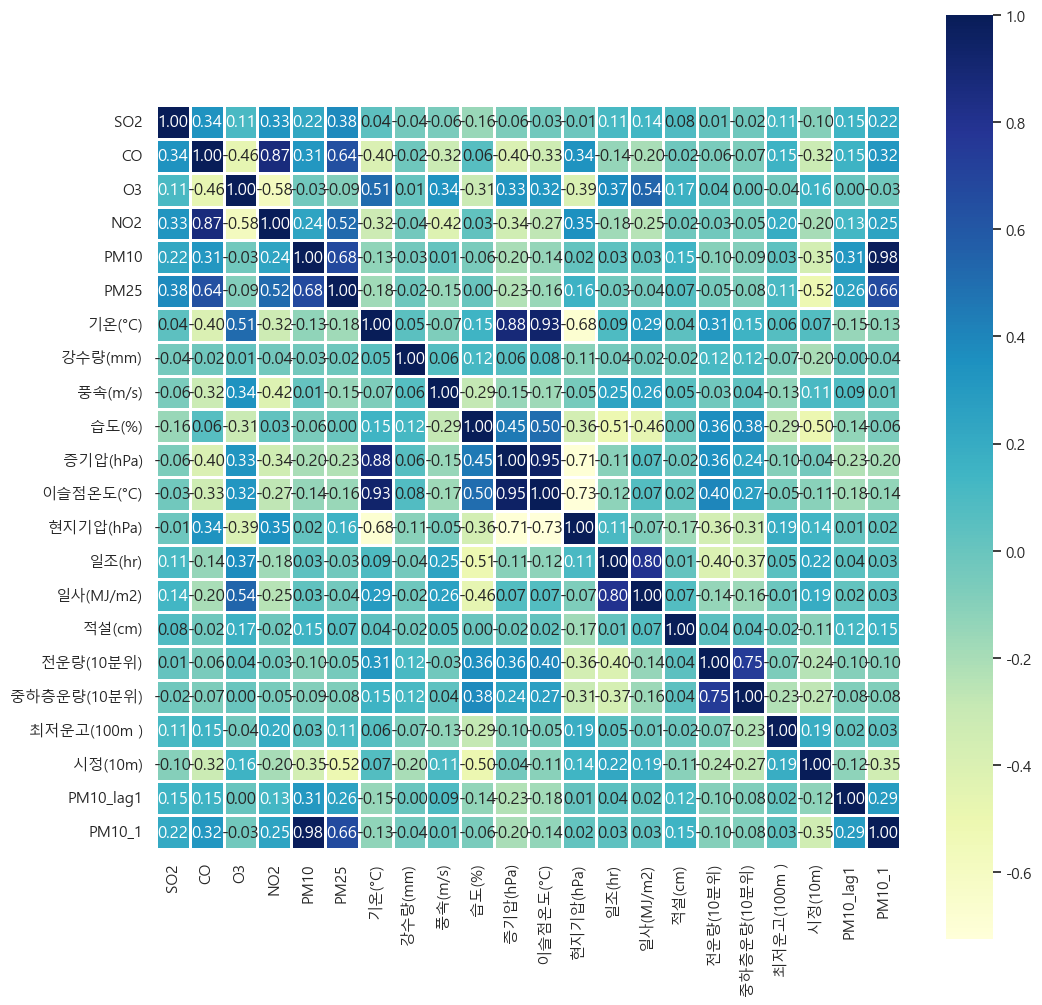

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 한글폰트 설정 (아래 코드를 실행하세요)

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

corr = df_21.corr()

plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr, annot=True, linewidths=.8, cmap="YlGnBu", fmt='.2f', square=True)
plt.show()